In [1]:
import threerra # Load threerra.py
import numpy as np

In [2]:
# Load IMB Quantum credentials

from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

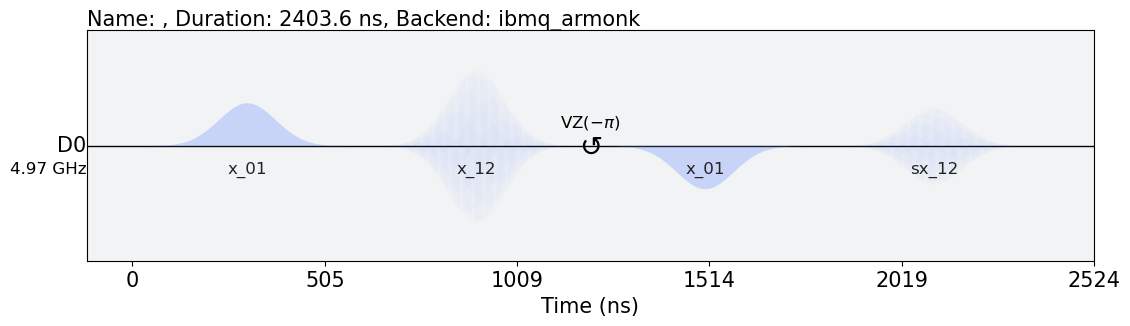

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.x_01()
qc.x_12()
qc.rz(np.pi)
qc.x_01()
qc.sx_12()
qc.compile()

# Test calibrations

In [ ]:
qc.calibrate_freq_01()

In [ ]:
qc.calibrate_pi_amp_01()

In [ ]:
qc.calibrate_freq_12()

In [ ]:
qc.calibrate_pi_amp_12()

# Test Measurement 

In [6]:
qc = threerra.QuantumCircuit3(backend)
qc.x_01()
qc.measure()
result = qc.run()
result.get_counts()

default measure
Job Status: job has successfully run


{'0': 66, '1': 958}